In [1]:
%pylab inline
from CO2_sim_1D import CO2_1D

######################
#### Downstream bnd seems to cause instability
####################################

Populating the interactive namespace from numpy and matplotlib


xc= 0
norm_fd= -1   maxdepth= 0.41525960860928235
full
xc= 1
norm_fd= -1   maxdepth= 0.555981014736153
full
xc= 2
norm_fd= -1   maxdepth= 0.48767943963789434
full
xc= 3
norm_fd= -1   maxdepth= 0.5446903475726554
full
xc= 4
norm_fd= -1   maxdepth= 0.5955949631964936
full
xc= 5
norm_fd= -1   maxdepth= 0.5076966686487372
full
xc= 6
norm_fd= -1   maxdepth= 0.5002216241872506
full
xc= 7
norm_fd= -1   maxdepth= 0.41440818160815207
full
xc= 8
norm_fd= -1   maxdepth= 0.45368555712657155
full
xc= 9
norm_fd= -1   maxdepth= 0.499974032842214
full
xc= 10
norm_fd= -1   maxdepth= 0.5358433548896979
full
xc= 11
norm_fd= -1   maxdepth= 0.560745039999007
full
xc= 12
norm_fd= -1   maxdepth= 0.47618587669903106
full
xc= 13
norm_fd= -1   maxdepth= 0.4131852303525255
full
xc= 14
norm_fd= -1   maxdepth= 0.4576268615178448
full
xc= 15
norm_fd= -1   maxdepth= 0.58191583384626
full
xc= 16
norm_fd= -1   maxdepth= 0.4426748861587636
full
xc= 17
norm_fd= -1   maxdepth= 0.49042237217714874
full
xc= 18
norm_fd= -1 

xc= 13
norm_fd= -1   maxdepth= 0.4881322133229222
full
xc= 14
norm_fd= -1   maxdepth= 0.5225403875286821
full
xc= 15
norm_fd= -1   maxdepth= 0.6253849457046077
full
xc= 16
norm_fd= -1   maxdepth= 0.5142843787087152
full
xc= 17
norm_fd= -1   maxdepth= 0.5520873005145372
full
xc= 18
norm_fd= -1   maxdepth= 0.6321427683354965
full
Air discharge =  -0.0  m^3/s
xc= 0
norm_fd= -1   maxdepth= 0.4751232609744762
full
xc= 1
norm_fd= -1   maxdepth= 0.5926860660347582
full
xc= 2
norm_fd= -1   maxdepth= 0.5354390993026548
full
xc= 3
norm_fd= -1   maxdepth= 0.5848349940399022
full
xc= 4
norm_fd= -1   maxdepth= 0.6304445395784135
full
xc= 5
norm_fd= -1   maxdepth= 0.5554633650585057
full
xc= 6
norm_fd= -1   maxdepth= 0.5505059348020968
full
xc= 7
norm_fd= -1   maxdepth= 0.48551802818026524
full
xc= 8
norm_fd= -1   maxdepth= 0.5165274567087754
full
xc= 9
norm_fd= -1   maxdepth= 0.5544801270166737
full
xc= 10
norm_fd= -1   maxdepth= 0.5851988063694514
full
xc= 11
norm_fd= -1   maxdepth= 0.607249204668

xc= 8
norm_fd= -1   maxdepth= 0.5534623252927917
full
xc= 9
norm_fd= -1   maxdepth= 0.5876388495348454
full
xc= 10
norm_fd= -1   maxdepth= 0.6158423019699356
full
xc= 11
norm_fd= -1   maxdepth= 0.6364375346835738
full
xc= 12
norm_fd= -1   maxdepth= 0.5767763216627853
full
xc= 13
norm_fd= -1   maxdepth= 0.5397004318978358
full
xc= 14
norm_fd= -1   maxdepth= 0.569278489219665
full
xc= 15
norm_fd= -1   maxdepth= 0.6596846702631672
full
xc= 16
norm_fd= -1   maxdepth= 0.5643711684042081
full
xc= 17
norm_fd= -1   maxdepth= 0.5971307103710166
full
xc= 18
norm_fd= -1   maxdepth= 0.6679336434475702
full
Air discharge =  -0.0  m^3/s
xc= 0
norm_fd= -1   maxdepth= 0.515453388556536
full
xc= 1
norm_fd= -1   maxdepth= 0.6201398602943196
full
xc= 2
norm_fd= -1   maxdepth= 0.5694738124948702
full
xc= 3
norm_fd= -1   maxdepth= 0.6143932615820256
full
xc= 4
norm_fd= -1   maxdepth= 0.6566582210132963
full
xc= 5
norm_fd= -1   maxdepth= 0.5895016569809297
full
xc= 6
norm_fd= -1   maxdepth= 0.58594044065164

xc= 11
norm_fd= -1   maxdepth= 0.6707593355099337
full
xc= 12
norm_fd= -1   maxdepth= 0.6188055238855141
full
xc= 13
norm_fd= -1   maxdepth= 0.5881253075368907
full
xc= 14
norm_fd= -1   maxdepth= 0.6141951596353842
full
xc= 15
norm_fd= -1   maxdepth= 0.6945629219139441
full
xc= 16
norm_fd= -1   maxdepth= 0.6117734840577426
full
xc= 17
norm_fd= -1   maxdepth= 0.6407674954213907
full
xc= 18
norm_fd= -1   maxdepth= 0.7040514865161143
full
Air discharge =  -0.0  m^3/s
xc= 0
norm_fd= -1   maxdepth= 0.5553690865388325
full
xc= 1
norm_fd= -1   maxdepth= 0.6491275905940763
full
xc= 2
norm_fd= -1   maxdepth= 0.60427007716914
full
xc= 3
norm_fd= -1   maxdepth= 0.6452699333655139
full
xc= 4
norm_fd= -1   maxdepth= 0.6844612025074417
full
xc= 5
norm_fd= -1   maxdepth= 0.6243009767517451
full
xc= 6
norm_fd= -1   maxdepth= 0.6219173965492734
full
xc= 7
norm_fd= -1   maxdepth= 0.5752338154686084
full
xc= 8
norm_fd= -1   maxdepth= 0.5995460158753171
full
xc= 9
norm_fd= -1   maxdepth= 0.629867142230412

xc= 6
norm_fd= -1   maxdepth= 0.6511382023123341
full
xc= 7
norm_fd= -1   maxdepth= 0.6098030619519441
full
xc= 8
norm_fd= -1   maxdepth= 0.6322405959222813
full
xc= 9
norm_fd= -1   maxdepth= 0.6602830043850053
full
xc= 10
norm_fd= -1   maxdepth= 0.68415684156648
full
xc= 11
norm_fd= -1   maxdepth= 0.702152089183365
full
xc= 12
norm_fd= -1   maxdepth= 0.6560277336480861
full
xc= 13
norm_fd= -1   maxdepth= 0.6298374858634728
full
xc= 14
norm_fd= -1   maxdepth= 0.6534742668991307
full
xc= 15
norm_fd= -1   maxdepth= 0.7263435237120794
full
xc= 16
norm_fd= -1   maxdepth= 0.65280410887262
full
xc= 17
norm_fd= -1   maxdepth= 0.6791367440381555
full
xc= 18
norm_fd= -1   maxdepth= 0.7367758667212383
full
Air discharge =  -0.0  m^3/s
xc= 0
norm_fd= -1   maxdepth= 0.5910064478241253
full
xc= 1
norm_fd= -1   maxdepth= 0.6763165614777871
full
xc= 2
norm_fd= -1   maxdepth= 0.6360804344386675
full
xc= 3
norm_fd= -1   maxdepth= 0.6739804859673348
full
xc= 4
norm_fd= -1   maxdepth= 0.7106436171239523


xc= 5
norm_fd= -1   maxdepth= 0.6791471405944389
full
xc= 6
norm_fd= -1   maxdepth= 0.6782385870523838
full
xc= 7
norm_fd= -1   maxdepth= 0.6411239163576892
full
xc= 8
norm_fd= -1   maxdepth= 0.6621043568027108
full
xc= 9
norm_fd= -1   maxdepth= 0.6883332814467216
full
xc= 10
norm_fd= -1   maxdepth= 0.7108697964585399
full
xc= 11
norm_fd= -1   maxdepth= 0.7280380653096845
full
xc= 12
norm_fd= -1   maxdepth= 0.6860393253487798
full
xc= 13
norm_fd= -1   maxdepth= 0.6628720591354474
full
xc= 14
norm_fd= -1   maxdepth= 0.6848828697834835
full
xc= 15
norm_fd= -1   maxdepth= 0.7524847410610999
full
xc= 16
norm_fd= -1   maxdepth= 0.6853963398966869
full
xc= 17
norm_fd= -1   maxdepth= 0.7099279782107271
full
xc= 18
norm_fd= -1   maxdepth= 0.7635876065854483
full
Air discharge =  -0.0  m^3/s
xc= 0
norm_fd= -1   maxdepth= 0.6199036182227158
full
xc= 1
norm_fd= -1   maxdepth= 0.6991474072352606
full
xc= 2
norm_fd= -1   maxdepth= 0.6622955411688363
full
xc= 3
norm_fd= -1   maxdepth= 0.697934810509

/home/mcoving/anaconda3/lib/python3.7/site-packages/scipy/optimize/zeros.py:341: RuntimeWarning: Tolerance of -0.0021467915306955243 reached.
  warnings.warn(msg, RuntimeWarning)


ValueError: f(a) and f(b) must have different signs

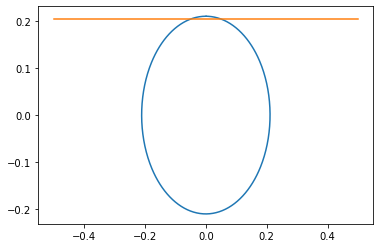

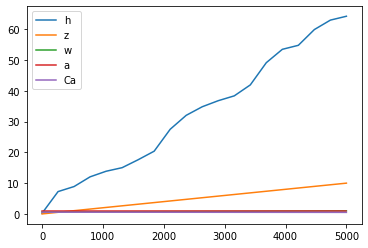

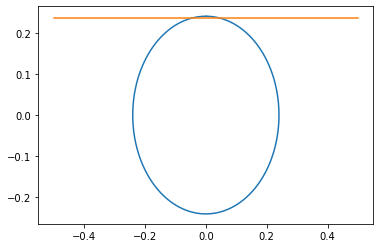

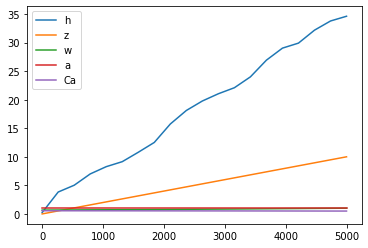

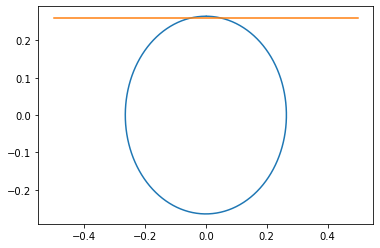

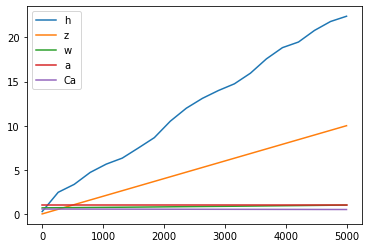

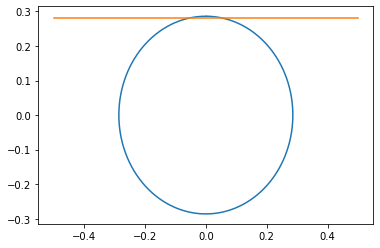

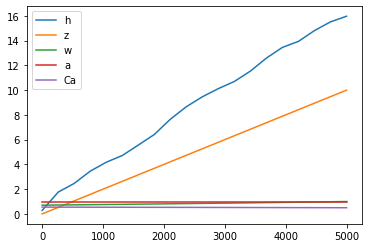

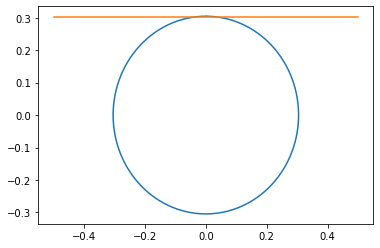

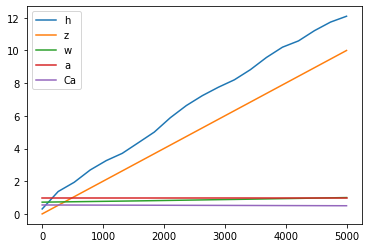

In [2]:
n=20
x = linspace(0,5000,n)
z = linspace(0,10,n)
np.random.seed(7)
r = 0.2*ones(n-1) + 0.1*np.random.rand(n-1)
#r[5] = 0.5
sim = CO2_1D(x,z, init_radii=r, 
             Q_w=.2, 
             T_outside=20., 
             D_a=35., D_w=35.,
             adv_disp_stabil_factor=0.5,
             reduction_factor=0.02,
            dt_erode=1.,
            xc_n=500)
ntimes = 1000
fd_old=0.
for t in arange(ntimes):
    sim.calc_flow_depths()
    fd_new = sim.fd_mids[0]
    if t>0 and np.abs(fd_new-fd_old)>0.05:
        print(asdf)
    fd_old = fd_new
    sim.calc_air_flow()
    #if sim.A_a.min()==0:
    #    print(asdf)
    sim.calc_steady_state_transport()
    sim.erode_xcs()
    #if t==160:
    #    print(asdf)
    if t % 10 == 0:
        timestep_str = '%04d' % (t,)
        print("Plotting timestep: ",t)
        figure()
        plot(sim.xcs[0].x ,sim.xcs[0].y)
        wl = sim.fd_mids[0]+ sim.xcs[0].y.min()
        plot([-.5,.5], [wl,wl])
        #plot(sim.xcs[10].x ,sim.xcs[10].y)
        #plot(sim.xcs[-1].x ,sim.xcs[-1].y)
        savefig('./XC-'+timestep_str+'.png')
        figure()
        xmid = (x[1:] + x[:-1])/2.
        plot(x, sim.h)
        plot(x,z)
        plot(x,sim.CO2_w)
        plot(x,sim.CO2_a)
        plot(x,sim.Ca)
        legend(['h','z','w','a','Ca'])
        savefig('./Profile-'+timestep_str+'.png')


In [ ]:
#for i, xc in enumerate(sim.xcs):
#    print(i)
#    xc.findLR(sim.fd_mids[i])
maxdepth = sim.xcs[0].ymax - sim.xcs[0].ymin
g=9.8
res = []
for f in linspace(0.01,0.95,50):
    Q=0.2
    depth=f*maxdepth
    wetidx = sim.xcs[0].y - sim.xcs[0].ymin < depth
    #print(wetidx)
    #print(depth)
    A = sim.xcs[0].calcA(wantidx=wetidx)
    print('A=',A)
    L,R = sim.xcs[0].findLR(depth)
    W = sim.xcs[0].x[R] - sim.xcs[0].x[L]
    print('W=',W)
    #print(depth,W,A)
    print(A**3/W - Q**2/g)
#    res.append(sim.xcs[0].crit_flow_depth_residual(f*maxdepth,0.2))

plot(res)
#wetidx = sim.xcs[0].y - sim.xcs[0].ymin < 0.01*maxdepth
#print(wetidx)
ylim([-0.05,0.05])

In [ ]:
xmid = (x[1:] + x[:-1])/2.
plot(x, sim.h)
plot(x,z)
#plot(xmid,sim.fd_mids)
plot(x,sim.CO2_w)
plot(x,sim.CO2_a)
plot(x,sim.Ca)
legend(['h','z','w','a','Ca'])


In [ ]:
from scipy.interpolate import splprep,splev,interp1d

In [ ]:
splprep()
splev()
interp1d()

In [ ]:
print(sim.flow_type)
print(sim.A_a)
print(sim.A_w)
print(sim.fd_mids)

In [ ]:
from scipy.signal import savgol_filter

i=0
x=sim.xcs[i].x
y=sim.xcs[i].y
xp=sim.xcs[i].xp
yp=sim.xcs[i].yp
xm=sim.xcs[i].xm
ym=sim.xcs[i].ym
plot(x,y,'.')
wl = sim.fd_mids[i] + y.min()
wl_old = fd_old + y.min()
plot([-.4,.4],[wl,wl])
plot([-.4,.4],[wl_old,wl_old],'--')
#xlim([-.4,.4])
#ylim([-2.45,-2.0])
maxdepth = y.max() - y.min()
fds=maxdepth*linspace(0.001,0.3,1000)
res=[]
res2 = []
As = []
Pws = []
for fd in fds:
    res.append(sim.xcs[i].normal_discharge_residual(fd,sim.slopes[i],0.1,0.2))
    As.append(sim.xcs[i].calcA(wantidx=y-y.min()<fd))
    Pws.append(sim.xcs[i].calcP(wantidx=y-y.min()<fd))
    res2.append(sim.xcs[i].crit_flow_depth_residual(fd,0.2))
figure()
plot(fds*maxdepth+y.min(),res)
#ylim([-0.01,0.01])
figure()
plot(fds*maxdepth+y.min(),res2)


figure()
#sim.xcs[i].create_A_interp()
#A_spline=sim.xcs[i].AfromSpline(fds*maxdepth)
#sim.xcs[i].create_P_interp()


plot(fds*maxdepth+y.min(),As)
As = array(As)
fil_As = savgol_filter(As,35,1)
#plot(fds*maxdepth+y.min(),fil_As)
plot(fds*maxdepth+y.min(),sim.xcs[i].A_interp(fds))

#figure()
#plot(fds*maxdepth+y.min(),Pws)
#plot(fds*maxdepth+y.min(),sim.xcs[i].P_interp(fds))

#figure()

#Pws = array(Pws)
#Qs = fil_As*sqrt(4*fil_As/Pws)
#plot(fds*maxdepth+y.min(),Qs)

print(wl_old)


In [ ]:
plot(x,y)#,(xp+xm)/2.)


In [ ]:
Tb=sim.xcs[-1].T_b
ywet = y[sim.xcs[-1].wetidx]
xwet = x[sim.xcs[-1].wetidx]
#plot(xwet[1:],Tb[1:]-Tb[:-1])
#plot(xwet,Tb)
dr=sim.xcs[-1].dr
#plot(xwet[1:],dr[1:]-dr[:-1])
plot(xwet,dr)

In [ ]:
from scipy.signal import savgol_filter

fil_dr = savgol_filter(dr,15,3,mode='wrap')
plot(xwet,dr,xwet,fil_dr)
figure()
plot(fil_dr[1:]-fil_dr[:-1])

In [ ]:
diff_bnd=0
diff_bnd2=1

V_w = sim.V_w
V_w_mean = sim.V_w_mean
dx = sim.dx_ad
dt = sim.dt_ad
CO2_w = sim.CO2_w
CO2_a = sim.CO2_a
print((1./dt -(np.sign(V_w[0])*V_w[diff_bnd]/V_w_mean)/(2.*dx))*CO2_w[diff_bnd])

print(((np.sign(V_w[0])*V_w[diff_bnd]/V_w_mean)/(2*dx))*CO2_w[diff_bnd2])

In [ ]:
sim.

In [ ]:
np.sign(V_w[0])*(V_w[diff_bnd]/V_w_mean)

In [ ]:
V_w_mean

In [ ]:
from olm.calcite import concCaEqFromPCO2,solutionFromCaPCO2,palmerFromSolution,pwpFromSolution,pwp_to_mm_yr

In [ ]:
concCaEqFromPCO2()

In [ ]:
from olm.calcite import concCaEqFromPCO2,solutionFromCaPCO2,palmerFromSolution,calc_K_H
g=9.8#m/s^2
rho_limestone = 2.6#g/cm^3
rho_w = 998.2#kg/m^3
D_Ca = 10**-9#m^2/s
nu = 1.3e-6#m^2/s at 10 C
Sc = nu/D_Ca
g_mol_CaCO3 = 100.09
L_per_m3 = 1000.
secs_per_year =  3.154e7
secs_per_hour = 60.*60.


#print(Sc)

In [ ]:
sim.update_dimnless_params()
sim.initialize_conc_arrays()

K_w = sim.gas_transf_vel*sim.W/sim.A_w
K_a = sim.gas_transf_vel*sim.W/sim.A_a
        

F = np.zeros(sim.n_nodes - 1)
F_palmer = np.zeros(sim.n_nodes - 1)

mm_yr_to_mols_sec = 100.*rho_limestone/g_mol_CaCO3/secs_per_year/100./(sim.D_H_w/2.)

i=sim.n_nodes-1
this_CO2_w = sim.CO2_w[i]*sim.pCO2_high
this_CO2_a = sim.CO2_a[i]*sim.pCO2_high
this_Ca = sim.Ca[i]*sim.Ca_eq_0
#if palmer:
sol = solutionFromCaPCO2(this_Ca, this_CO2_w, T_C=sim.T_cave)
F_pwp = pwp_to_mm_yr(pwpFromSolution(sol,PCO2=this_CO2_w))
F_palmer[i-1] = palmerFromSolution(sol, PCO2=this_CO2_w)
R_palmer = F_palmer[i-1]*mm_yr_to_mols_sec[i-1]
this_xc = sim.xcs[i-1]
eSlope = (sim.h[i] - sim.h[i-1])/sim.L_arr[i-1]
this_xc.setEnergySlope(eSlope)
this_xc.setMaxVelPoint(sim.fd_mids[i-1])
this_xc.calcUmax(sim.Q_w)
T_b = this_xc.calcT_b()
eps = 5*nu*Sc**(-1./3.)/np.sqrt(T_b/rho_w)
#print(eps)
Ca_Eq = concCaEqFromPCO2(this_CO2_w, T_C=sim.T_cave)
#print(this_Ca,Ca_Eq)
F_xc = (D_Ca/eps)*(Ca_Eq - this_Ca)*L_per_m3
P_w = this_xc.wet_ls.sum()
A_w = this_xc.calcA(this_xc.wetidx)
F[i-1] = np.sum(F_xc*this_xc.wet_ls)/P_w #Units of F are mols/m^2/sec
R = F[i-1]*P_w*sim.L_arr[i-1]#4.*F[i-1]/sim.D_H_w[i-1]
sim.F = F
R_CO2 = R/sim.K_H
#dx is negative, so signs on dC terms flip
dCO2_a = -sim.L_arr[i-1]*K_a[i-1]/sim.V_a[i-1]*(this_CO2_w - this_CO2_a)
dCO2_w = sim.L_arr[i-1]*K_w[i-1]/sim.V_w[i-1]*(this_CO2_w - this_CO2_a) - R_CO2/sim.Q_w/L_per_m3#sim.L_arr[i-1]*R_CO2/sim.V_w[i-1]
dCa = R/sim.Q_w/L_per_m3#-sim.L_arr[i-1]*R/sim.V_w[i-1]/(sim.L_arr[i-1]*A_w)/L_per_m3
print(dCO2_a,dCO2_w,dCa)
sim.CO2_a[i-1] = (this_CO2_a + dCO2_a)/sim.pCO2_high
sim.CO2_w[i-1] = (this_CO2_w + dCO2_w)/sim.pCO2_high
sim.Ca[i-1] = (this_Ca + dCa)/sim.Ca_eq_0


In [ ]:
print(sim.Q_w)
print(A_w*sim.V_w[i-1])
sim.L_arr[i-1]*R_CO2/sim.V_w[i-1]
R_CO2/sim.Q_w/L_per_m3

In [ ]:
this_xc.x[this_xc.wetidx].shape
F_xc.

In [ ]:
Re = abs(sim.V_w[i-1])*sim.D_H_w[i-1]/nu
print(Re)
f = 0.1
Sh = (f/8)*(Re-1000)*Sc/(1+12.7*sqrt(f/8)*(Sc**(2./3.) - 1))
print(Sh)
eps_test = sim.D_H_w[i-1]/Sh
print(eps_test)

In [ ]:
D_Ca/eps_test

In [ ]:
sim.D_H_w[i-1]

In [ ]:
eSlope

In [ ]:
cm_m=100.
F_to_m_yr = g_mol_CaCO3*secs_per_year/rho_limestone/cm_m**3
print(F_to_m_yr*sim.xcs[0].F_xc)